### En este Notebook se buscara realizar un entendimiento inicial de los datos de los registros medicos. 

En este caso se va a realizar un análisis inicial de los datos que se encuentran en las pestañas "data" y  "laboratorios", las cuales contienen información de biopsias y resultados de laboratorios, respectivamente y correspondiente a diferentes pacientes con diferentes diagnósticos de Fibrosis hepática.

### Para los datos de las biopsias

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Se cargan los datos de la pestaña "data"
biopsias = pd.read_excel("data/Base entrega.xlsx", sheet_name="data")

In [146]:
print("Tamaño DF biopsias:", biopsias.shape)

print("Tipos de datos DF biopsias:")
print(biopsias.dtypes)

Tamaño DF biopsias: (148, 7)
Tipos de datos DF biopsias:
Codigo                      object
FIBROSIS                    object
NUMPACIENTE                  int64
CUPS                         int64
FECHAREVISION               object
TEXTO_RESULTADO             object
FECHA _RESULTADO    datetime64[ns]
dtype: object


In [147]:
biopsias.head()

,Codigo,FIBROSIS,NUMPACIENTE,CUPS,FECHAREVISION,TEXTO_RESULTADO,FECHA _RESULTADO
0,1-25,F1,35,898101,2023-12-21 00:00:00,"\nHÍGADO, BIOPSIA TRANSYUGULAR; ESTUDIOS DE MI...",2023-12-15
1,0-1,F0,1,898101,2018-04-11 00:00:00,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26
2,0-1,F0,1,898101,2018-01-29 00:00:00,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26
3,4-2,F4,98,898101,2023-01-31 00:00:00,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26
4,4-2,F4,98,898101,2023-02-11 00:00:00,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26


In [148]:
biopsias['NUMPACIENTE'].nunique()

120

De lo anterior notamos que se cuenta con 148 registros de biopsias y además se identificó que estos pertenecen a 120 pacientes diferentes. En cuanto a los tipos de datos y los valores que se estan viendo en el dataframe se evidencia que va a ser necesario realizar algunos arreglos para poder realizar los siguientes análisis.

In [149]:
biopsias['FECHAREVISION'] = pd.to_datetime(biopsias['FECHAREVISION'], errors='coerce')

In [150]:
biopsias.head()  # Muestra las primeras filas del DataFrame para inspección inicial

,Codigo,FIBROSIS,NUMPACIENTE,CUPS,FECHAREVISION,TEXTO_RESULTADO,FECHA _RESULTADO
0,1-25,F1,35,898101,2023-12-21,"\nHÍGADO, BIOPSIA TRANSYUGULAR; ESTUDIOS DE MI...",2023-12-15
1,0-1,F0,1,898101,2018-04-11,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26
2,0-1,F0,1,898101,2018-01-29,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26
3,4-2,F4,98,898101,2023-01-31,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26
4,4-2,F4,98,898101,2023-02-11,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26


#### Análisis univariado

In [151]:
biopsias['FIBROSIS'].value_counts()

FIBROSIS
F1    44
F4    33
F3    27
F2    26
F0    18
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribución de tipos de Fibrosis')

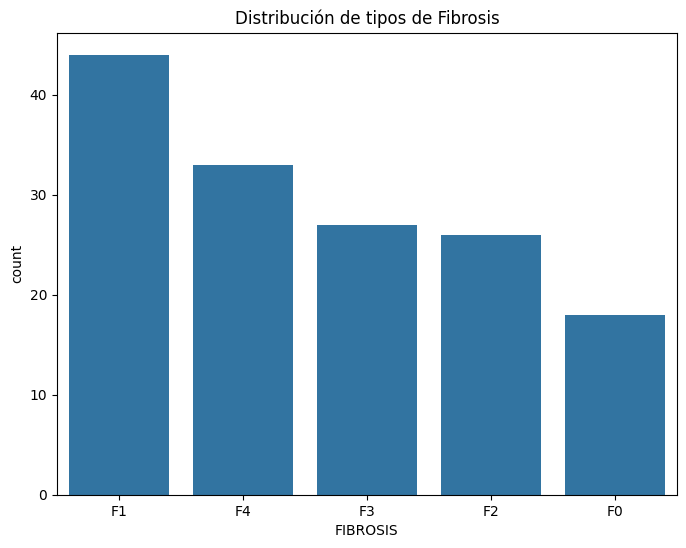

In [152]:
plt.figure(figsize=(8, 6))
sns.countplot(data=biopsias, x='FIBROSIS', order=biopsias['FIBROSIS'].value_counts().index)
plt.title('Distribución de tipos de Fibrosis')

In [153]:
biopsias['Codigo'].nunique()

120

In [154]:
biopsias['CUPS'].unique()

array([898101, 898103])

En este caso no aporta mucho realizar análisis multivariado sobre estas características ya que no nos brindaría nueva información, por lo que se continuará con el analisis de los datos de laboratorio y se evaluará hacer un "join" de los dataframes para enriquecer el análisis.

### Para los datos de los resultados de laboratorios

In [155]:
labs = pd.read_excel("data/Base entrega.xlsx", sheet_name="laboratorios")

In [156]:
print("Tamaño DF laboratorios:", labs.shape)

print("Tipos de datos DF laboratorios:")
print(labs.dtypes)

Tamaño DF laboratorios: (9648, 8)
Tipos de datos DF laboratorios:
RESULTADO_1             object
FECHA_EXAMEN    datetime64[ns]
PRUEBA                  object
Codigo                  object
FIBROSIS                object
NUMPACIENTE              int64
ESTUDIO                 object
RESULTADO_2             object
dtype: object


In [157]:
labs.head()

,RESULTADO_1,FECHA_EXAMEN,PRUEBA,Codigo,FIBROSIS,NUMPACIENTE,ESTUDIO,RESULTADO_2
0,0.22,2017-07-30 08:53:38,BILIRRUBINA DIRECTA,0-1,F0,1,BILIRRUBINAS,0.22
1,0.78,2017-07-30 08:53:38,BILIRRUBINA INDIRECTA,0-1,F0,1,BILIRRUBINAS,0.78
2,1,2017-07-30 08:53:38,BILIRRUBINA TOTAL,0-1,F0,1,BILIRRUBINAS,1
3,36,2017-07-30 08:53:38,GAMMA GLUTAMIL TRANSFERASA (GGT),0-1,F0,1,GAMMA GLUTAMIL TRANSFERASA (GGT),36
4,1.07,2017-07-30 08:53:38,INR,0-1,F0,1,TIEMPO DE PROTROMBINA [PT],1.07


In [158]:
labs.drop(columns="RESULTADO_2", inplace=True)

In [159]:
labs['RESULTADO_1'] = pd.to_numeric(labs['RESULTADO_1'], errors='coerce')

#### Analisis univariado

In [160]:
print("total de codigos diferentes: ", labs['Codigo'].unique().size)
print("total de pacientes con laboratorio: ", labs['NUMPACIENTE'].unique().size)

total de codigos diferentes:  78
total de pacientes con laboratorio:  78


In [161]:
# Tipos de estudios realizados en los exámenes de laboratorio
labs['ESTUDIO'].unique()

array(['BILIRRUBINAS', 'GAMMA GLUTAMIL TRANSFERASA (GGT)',
       'TIEMPO DE PROTROMBINA [PT]', 'HEMOGRAMA',
       'TRANSAMINASA GLUTAMICO OXALACETICA O ASPARTATO AMINO TRANSFERASA (TGO-AST)',
       'TRANSAMINASA GLUTAMICO PIRUVICA O ALANINO AMINO TRANSFERASA (TGP-ALT)',
       'DESHIDROGENASA LACTICA (LDH)', 'FOSFATASA ALCALINA'], dtype=object)

In [162]:
#Conteo de cada tipo de estudio
labs['ESTUDIO'].value_counts()

ESTUDIO
BILIRRUBINAS                                                                  3513
HEMOGRAMA                                                                     1641
TRANSAMINASA GLUTAMICO PIRUVICA O ALANINO AMINO TRANSFERASA (TGP-ALT)         1196
TRANSAMINASA GLUTAMICO OXALACETICA O ASPARTATO AMINO TRANSFERASA (TGO-AST)    1196
FOSFATASA ALCALINA                                                             987
TIEMPO DE PROTROMBINA [PT]                                                     905
GAMMA GLUTAMIL TRANSFERASA (GGT)                                               118
DESHIDROGENASA LACTICA (LDH)                                                    92
Name: count, dtype: int64

In [163]:
# Conteo de cada tipo de prueba
labs['PRUEBA'].value_counts()

PRUEBA
PLAQUETAS                                                                     1641
TRANSAMINASA GLUTAMICO OXALACETICA O ASPARTATO AMINO TRANSFERASA (TGO-AST)    1196
TRANSAMINASA GLUTAMICO PIRUVICA O ALANINO AMINO TRANSFERASA (TGP-ALT)         1196
BILIRRUBINA DIRECTA                                                           1171
BILIRRUBINA INDIRECTA                                                         1171
BILIRRUBINA TOTAL                                                             1171
FOSFATASA ALCALINA                                                             987
INR                                                                            905
GAMMA GLUTAMIL TRANSFERASA (GGT)                                               118
DESHIDROGENASA LACTICA (LDH)                                                    92
Name: count, dtype: int64

In [164]:
labs['FIBROSIS'].value_counts()

FIBROSIS
F3    3476
F4    2684
F1    2063
F2     823
F0     602
Name: count, dtype: int64

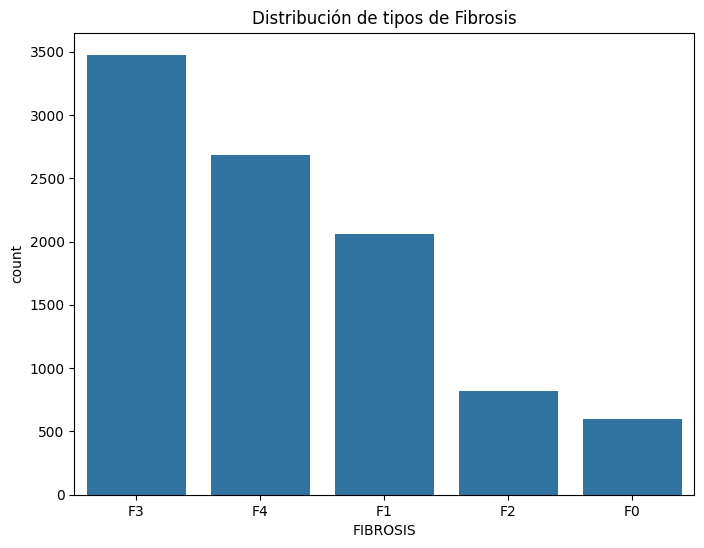

In [165]:
plt.figure(figsize=(8, 6))
sns.countplot(data=labs, x='FIBROSIS', order=labs['FIBROSIS'].value_counts().index)
plt.title('Distribución de tipos de Fibrosis')
plt.show()

#### Analisis multivariado

In [166]:
df2["RESULTADO_1"].describe()

count     118.000000
mean      314.771186
std       360.044048
min        13.000000
25%        39.750000
50%       179.500000
75%       501.000000
max      1575.000000
Name: RESULTADO_1, dtype: float64

##### Relación de la Bilirrubina Total con el tipo de fibrosis hepática

In [167]:
df2 = labs[labs['PRUEBA'] == 'BILIRRUBINA TOTAL']

Text(0.5, 1.0, 'Distribución de Bilirrubina Total por Tipo de Fibrosis')

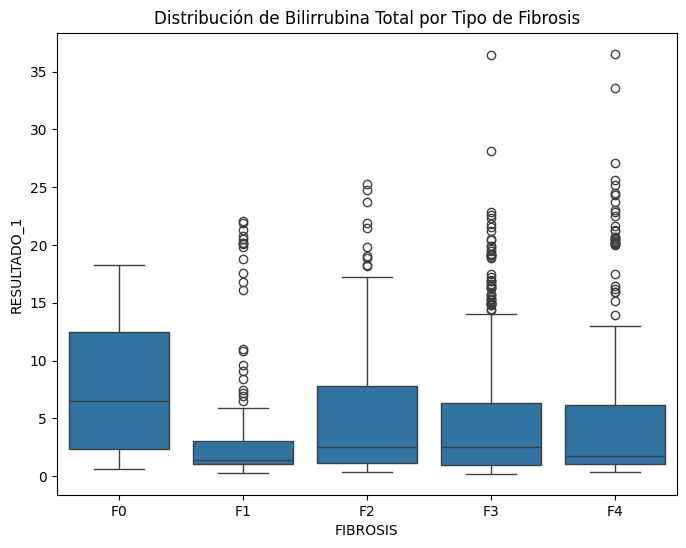

In [168]:
# Vamos a ver como se relaciona el resultado de la prueba de Bilirrubina total con el tipo de Fibrosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='FIBROSIS', y='RESULTADO_1')
plt.title('Distribución de Bilirrubina Total por Tipo de Fibrosis')

##### Relación de la Bilirrubina Directa con el tipo de fibrosis hepática

In [169]:
df2 = labs[labs['PRUEBA'] == 'BILIRRUBINA DIRECTA']

Text(0.5, 1.0, 'Distribución de Bilirrubina Directa por Tipo de Fibrosis')

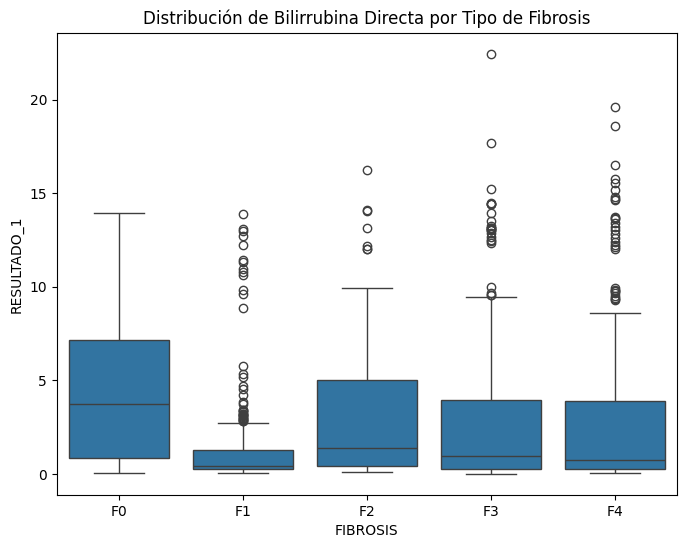

In [170]:
# Vamos a ver como se relaciona el resultado de la prueba de Bilirrubina directa con el tipo de Fibrosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='FIBROSIS', y='RESULTADO_1')
plt.title('Distribución de Bilirrubina Directa por Tipo de Fibrosis')

##### Relación de la Bilirrubina Indirecta con el tipo de fibrosis hepática

In [171]:
df2 = labs[labs['PRUEBA'] == 'BILIRRUBINA INDIRECTA']

Text(0.5, 1.0, 'Distribución de Bilirrubina Indirecta por Tipo de Fibrosis')

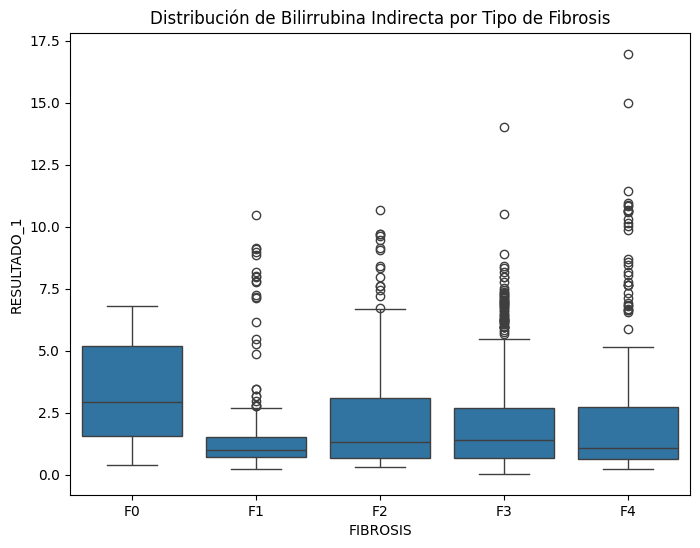

In [172]:
# Vamos a ver como se relaciona el resultado de la prueba de Bilirrubina total con el tipo de Fibrosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='FIBROSIS', y='RESULTADO_1')
plt.title('Distribución de Bilirrubina Indirecta por Tipo de Fibrosis')

##### Relación de la Transaminasa TGO con el tipo de fibrosis hepática

In [173]:
df2 = labs[labs['PRUEBA'] == 'TRANSAMINASA GLUTAMICO OXALACETICA O ASPARTATO AMINO TRANSFERASA (TGO-AST)']

In [174]:
df2['RESULTADO_1'].describe()

count    1196.000000
mean      166.903846
std       432.543579
min         8.000000
25%        33.000000
50%        61.000000
75%       126.000000
max      6046.000000
Name: RESULTADO_1, dtype: float64

Text(0.5, 1.0, 'Distribución de TGO por Tipo de Fibrosis')

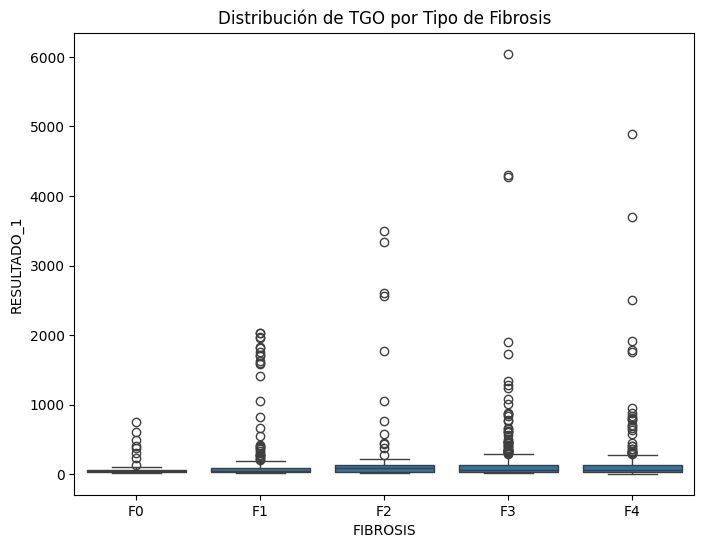

In [175]:
# Vamos a ver como se relaciona el resultado de la prueba de Bilirrubina total con el tipo de Fibrosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='FIBROSIS', y='RESULTADO_1')
plt.title('Distribución de TGO por Tipo de Fibrosis')

##### Relación de la Transaminasa TGP con el tipo de fibrosis hepática

In [176]:
df2 = labs[labs['PRUEBA'] == 'TRANSAMINASA GLUTAMICO PIRUVICA O ALANINO AMINO TRANSFERASA (TGP-ALT)']

Text(0.5, 1.0, 'Distribución de TGP por Tipo de Fibrosis')

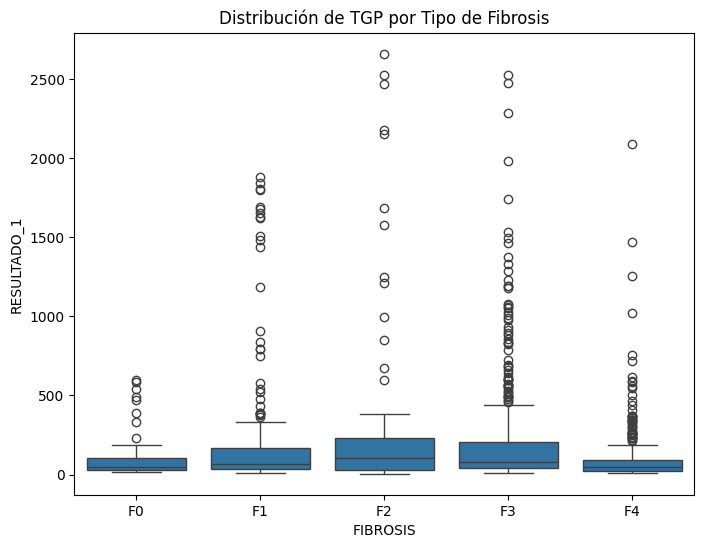

In [177]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, x='FIBROSIS', y='RESULTADO_1')
plt.title('Distribución de TGP por Tipo de Fibrosis')

## Cruce de los Dataframes con los datos de la pestaña "personales"

### Cruce de datos de Biopsias con datos personales

In [178]:
personales = pd.read_excel("data/Base entrega.xlsx", sheet_name="personales")

In [181]:
bio_personales = pd.merge(biopsias, personales,  how='left')

In [182]:
bio_personales.head()

,Codigo,FIBROSIS,NUMPACIENTE,CUPS,FECHAREVISION,TEXTO_RESULTADO,FECHA _RESULTADO,FECHA_NACIMIENTO,EDAD_ACTUAL,SEXO_PAC
0,1-25,F1,35,898101,2023-12-21,"\nHÍGADO, BIOPSIA TRANSYUGULAR; ESTUDIOS DE MI...",2023-12-15,1952-12-29,72,M
1,0-1,F0,1,898101,2018-04-11,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26,1948-12-18,76,M
2,0-1,F0,1,898101,2018-01-29,"\nHIGADO, BIOPSIA TRUCUT: \nESTEATOHSIS MODERA...",2018-01-26,1948-12-18,76,M
3,4-2,F4,98,898101,2023-01-31,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26,1949-05-18,76,M
4,4-2,F4,98,898101,2023-02-11,"\n\nHIGADO, BIOPSIA POR TRUCUT, ESTUDIOS DE MI...",2023-01-26,1949-05-18,76,M


Text(0.5, 1.0, 'Distribución de Edad por Tipo de Fibrosis')

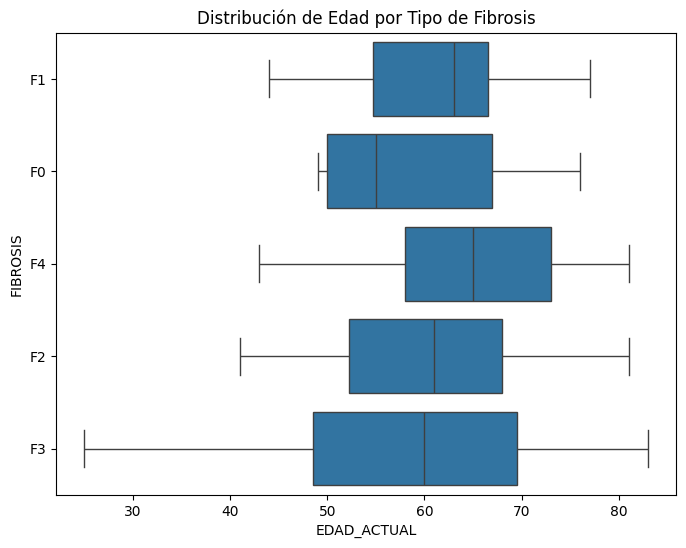

In [193]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=bio_personales, x='EDAD_ACTUAL', y='FIBROSIS')
plt.title('Distribución de Edad por Tipo de Fibrosis')

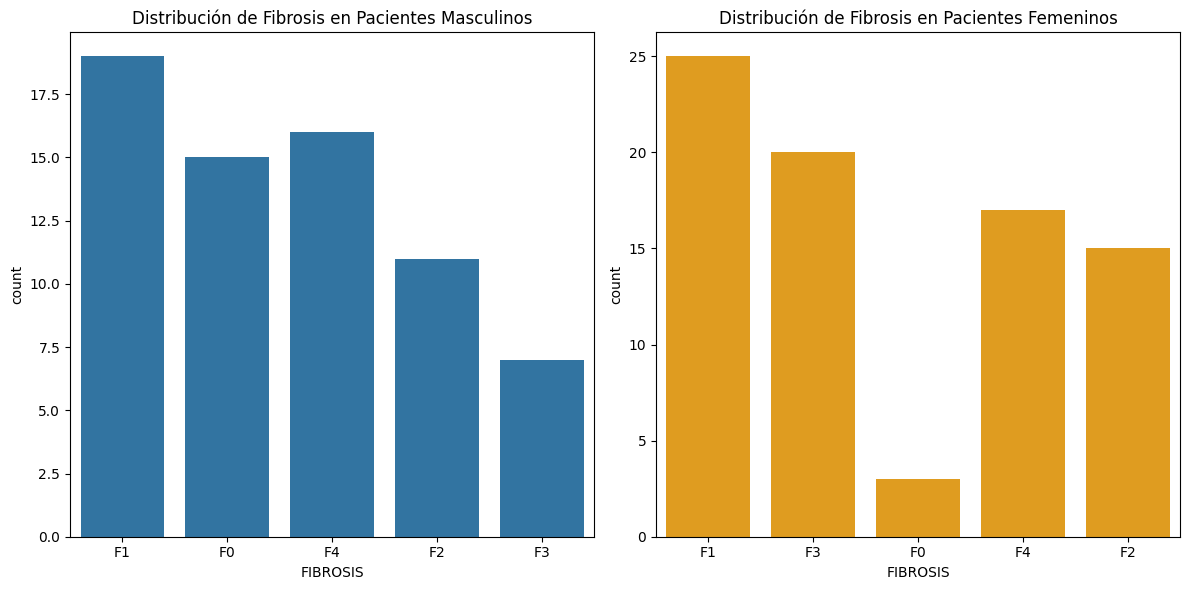

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico para pacientes masculinos
sns.countplot(
    data=bio_personales[bio_personales['SEXO_PAC'] == 'M'],
    x='FIBROSIS',
    ax=axes[0]
)
axes[0].set_title('Distribución de Fibrosis en Pacientes Masculinos')

# Gráfico para pacientes femeninos
sns.countplot(
    data=bio_personales[bio_personales['SEXO_PAC'] == 'F'],
    x='FIBROSIS',
    ax=axes[1],
    color='orange'
)
axes[1].set_title('Distribución de Fibrosis en Pacientes Femeninos')

plt.tight_layout()  # Ajusta automáticamente los espacios entre subplots
plt.show()

### Cruce de datos de laboratorios con datos personales

In [214]:
labs_personales = pd.merge(labs, personales,  how='left')

In [215]:
labs_personales.head()

,RESULTADO_1,FECHA_EXAMEN,PRUEBA,Codigo,FIBROSIS,NUMPACIENTE,ESTUDIO,FECHA_NACIMIENTO,EDAD_ACTUAL,SEXO_PAC
0,0.22,2017-07-30 08:53:38,BILIRRUBINA DIRECTA,0-1,F0,1,BILIRRUBINAS,1948-12-18,76,M
1,0.78,2017-07-30 08:53:38,BILIRRUBINA INDIRECTA,0-1,F0,1,BILIRRUBINAS,1948-12-18,76,M
2,1.00,2017-07-30 08:53:38,BILIRRUBINA TOTAL,0-1,F0,1,BILIRRUBINAS,1948-12-18,76,M
3,36.00,2017-07-30 08:53:38,GAMMA GLUTAMIL TRANSFERASA (GGT),0-1,F0,1,GAMMA GLUTAMIL TRANSFERASA (GGT),1948-12-18,76,M
4,1.07,2017-07-30 08:53:38,INR,0-1,F0,1,TIEMPO DE PROTROMBINA [PT],1948-12-18,76,M


Text(0.5, 1.0, 'Distribución de Edad por Tipo de Fibrosis')

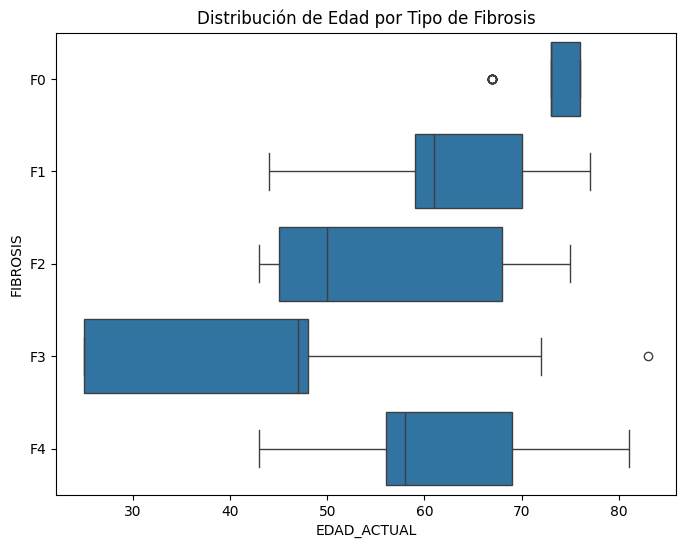

In [218]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=labs_personales, x='EDAD_ACTUAL', y='FIBROSIS')
plt.title('Distribución de Edad por Tipo de Fibrosis')

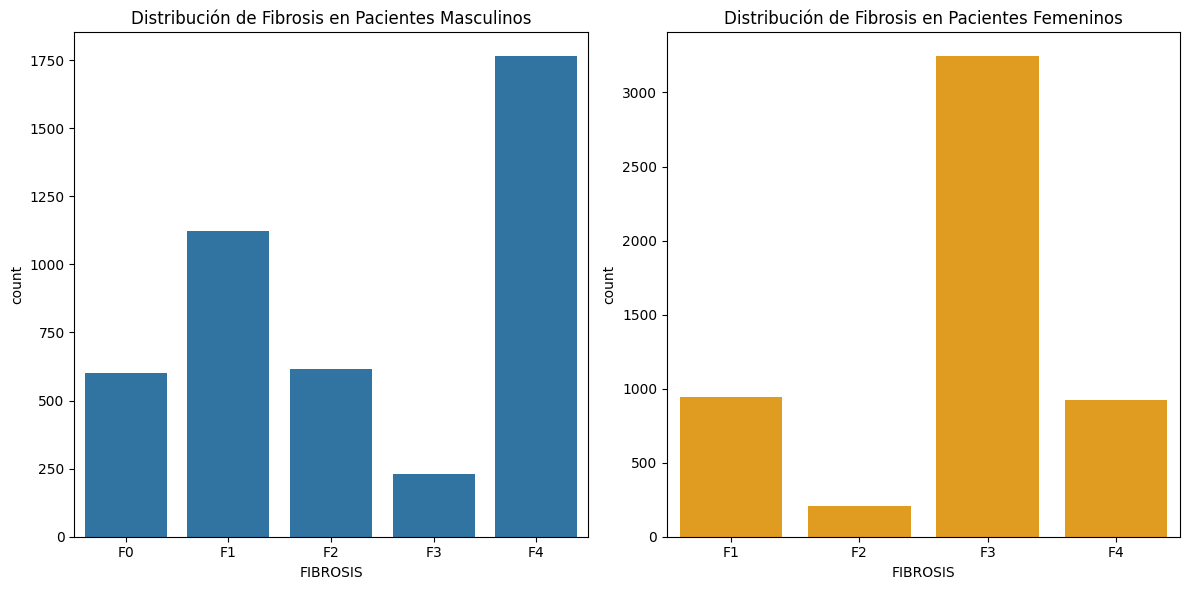

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico para pacientes masculinos
sns.countplot(
    data=labs_personales[labs_personales['SEXO_PAC'] == 'M'],
    x='FIBROSIS',
    ax=axes[0]
)
axes[0].set_title('Distribución de Fibrosis en Pacientes Masculinos')

# Gráfico para pacientes femeninos
sns.countplot(
    data=labs_personales[labs_personales['SEXO_PAC'] == 'F'],
    x='FIBROSIS',
    ax=axes[1],
    color='orange'
)
axes[1].set_title('Distribución de Fibrosis en Pacientes Femeninos')

plt.tight_layout()  # Ajusta automáticamente los espacios entre subplots
plt.show()